# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
     
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8da97d9972d58c8f6fdf5fab1b4bd4e3&units=imperial&q=airai'

In [4]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 125.41, 'lat': -8.93},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 56.41,
  'feels_like': 53.98,
  'temp_min': 56.41,
  'temp_max': 56.41,
  'pressure': 1011,
  'humidity': 67,
  'sea_level': 1011,
  'grnd_level': 854},
 'wind': {'speed': 2.48, 'deg': 91},
 'clouds': {'all': 91},
 'dt': 1588194510,
 'sys': {'country': 'TL', 'sunrise': 1588196491, 'sunset': 1588238966},
 'timezone': 32400,
 'id': 1651810,
 'name': 'Airai',
 'cod': 200}

In [10]:

# set up lists to hold reponse info

dic = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
    response = requests.get(query_url).json()
    print(response)
    try:
        a = {
             "city":response['city'],
             "lat": response['coord']['lat'],
             "temp_max": response['main']['temp_max'],
             "lon": response['coord']['lon'],
             "country":response['sys']['country'],
             "clouds":response['all']['clouds'],
             "wind speed":response['wind']['speed'],
             "humidity":response['main']['humidity']
}
              
        dic.append(a)
        
    except: 
        print('city not found')
        pass


{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.25, 'feels_like': 55.02, 'temp_min': 64.4, 'temp_max': 66, 'pressure': 1008, 'humidity': 48}, 'visibility': 16093, 'wind': {'speed': 16.11, 'deg': 160, 'gust': 26.4}, 'clouds': {'all': 90}, 'dt': 1588194638, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1588155276, 'sunset': 1588205619}, 'timezone': -14400, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}
city not found
{'coord': {'lon': 88.4, 'lat': 69.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': -4.23, 'temp_min': 14, 'temp_max': 14, 'pressure': 1014, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 22.37, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1588194651, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1588193326, 'sunset': 158

{'coord': {'lon': 59.38, 'lat': 42.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.22, 'feels_like': 50.74, 'temp_min': 55.4, 'temp_max': 59, 'pressure': 1021, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1588194664, 'sys': {'type': 1, 'id': 8993, 'country': 'TM', 'sunrise': 1588208362, 'sunset': 1588258786}, 'timezone': 18000, 'id': 601551, 'name': 'Akdepe', 'cod': 200}
city not found
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.56, 'feels_like': 80.89, 'temp_min': 79.56, 'temp_max': 79.56, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1012}, 'wind': {'speed': 14.2, 'deg': 349}, 'rain': {'1h': 0.29}, 'clouds': {'all': 46}, 'dt': 1588194665, 'sys': {'country': 'PF', 'sunrise': 1588173542, 'sunset': 1588214

{'coord': {'lon': -17.1, 'lat': 32.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.03, 'feels_like': 59.02, 'temp_min': 57, 'temp_max': 66.2, 'pressure': 1025, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1588194673, 'sys': {'type': 1, 'id': 6894, 'country': 'PT', 'sunrise': 1588141375, 'sunset': 1588189695}, 'timezone': 3600, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
city not found
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.71, 'feels_like': 36.03, 'temp_min': 42.71, 'temp_max': 42.71, 'pressure': 1001, 'humidity': 56, 'sea_level': 1001, 'grnd_level': 932}, 'wind': {'speed': 4.59, 'deg': 191}, 'clouds': {'all': 100}, 'dt': 1588194674, 'sys': {'country': 'CA', 'sunrise': 1588165632, 'sunset': 1588223230},

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 18.01, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 1023, 'humidity': 62}, 'visibility': 24140, 'wind': {'speed': 2.24}, 'clouds': {'all': 20}, 'dt': 1588194687, 'sys': {'type': 1, 'id': 968, 'country': 'CA', 'sunrise': 1588146247, 'sunset': 1588208153}, 'timezone': -14400, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
city not found
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.76, 'feels_like': 73.08, 'temp_min': 77, 'temp_max': 78.8, 'pressure': 1021, 'humidity': 74}, 'visibility': 16093, 'wind': {'speed': 20.8, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1588194688, 'sys': {'type': 1, 'id': 7873, 'country': 'U

{'coord': {'lon': -93.22, 'lat': 45.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 59.29, 'feels_like': 50.02, 'temp_min': 57, 'temp_max': 61, 'pressure': 1015, 'humidity': 50}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 20, 'gust': 28.86}, 'clouds': {'all': 40}, 'dt': 1588194701, 'sys': {'type': 1, 'id': 4900, 'country': 'US', 'sunrise': 1588158250, 'sunset': 1588209355}, 'timezone': -18000, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
city not found
{'coord': {'lon': 135.87, 'lat': -34.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 53.71, 'feels_like': 40.75, 'temp_min': 53.71, 'temp_max': 53.71, 'pressure': 1017, 'humidity': 69, 'sea_level': 1017, 'grnd_level': 1014}, 'wind': {'speed': 20.47, 'deg': 194}, 'rain': {'1h': 0.3}, 'clouds': {'all': 42}, 'dt': 1588194701, 'sys': {'country': 'AU', 'sunrise

{'coord': {'lon': -152.41, 'lat': 57.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 41.25, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1002, 'humidity': 61}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1588194712, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1588170055, 'sunset': 1588225958}, 'timezone': -28800, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
city not found
{'coord': {'lon': -12.51, 'lat': 7.53}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.41, 'feels_like': 88.39, 'temp_min': 81.41, 'temp_max': 81.41, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 5.99, 'deg': 286}, 'clouds': {'all': 18}, 'dt': 1588194713, 'sys': {'country': 'SL', 'sunrise': 1588142151, 'sunset': 1588186715}, '

{'coord': {'lon': 114.08, 'lat': 71.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.34, 'feels_like': 7.2, 'temp_min': 16.34, 'temp_max': 16.34, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 6.64, 'deg': 5}, 'clouds': {'all': 100}, 'dt': 1588194729, 'sys': {'country': 'RU', 'sunrise': 1588184648, 'sunset': 1588256246}, 'timezone': 32400, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
city not found
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 84.06, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1014, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 110}, 'clouds': {'all': 7}, 'dt': 1588194730, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1588179360, 'sunset': 1588220190}, 'time

{'coord': {'lon': -81.72, 'lat': 43.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57.24, 'feels_like': 43.72, 'temp_min': 55, 'temp_max': 60.01, 'pressure': 1001, 'humidity': 85}, 'wind': {'speed': 25.52, 'deg': 150}, 'rain': {'1h': 0.26}, 'clouds': {'all': 100}, 'dt': 1588194736, 'sys': {'type': 3, 'id': 2008021, 'country': 'CA', 'sunrise': 1588155662, 'sunset': 1588206423}, 'timezone': -14400, 'id': 5962442, 'name': 'Goderich', 'cod': 200}
city not found
{'coord': {'lon': 36.2, 'lat': 16.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.66, 'feels_like': 74.32, 'temp_min': 83.66, 'temp_max': 83.66, 'pressure': 1008, 'humidity': 23, 'sea_level': 1008, 'grnd_level': 962}, 'wind': {'speed': 13.31, 'deg': 7}, 'clouds': {'all': 96}, 'dt': 1588194737, 'sys': {'country': 'SD', 'sunrise': 1588129892, 'sunset': 1588175595}, '

{'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.15, 'feels_like': 22.48, 'temp_min': 30.15, 'temp_max': 30.15, 'pressure': 1000, 'humidity': 90, 'sea_level': 1000, 'grnd_level': 968}, 'wind': {'speed': 6.22, 'deg': 106}, 'clouds': {'all': 99}, 'dt': 1588194745, 'sys': {'country': 'RU', 'sunrise': 1588192878, 'sunset': 1588250930}, 'timezone': 28800, 'id': 2012956, 'name': 'Yerbogachën', 'cod': 200}
city not found
{'coord': {'lon': 51.58, 'lat': 61.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 21.81, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1000, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 40}, 'clouds': {'all': 98}, 'dt': 1588194746, 'sys': {'type': 1, 'id': 9036, 'country': 'RU', 'sunrise': 1588206211, 'sunset': 158826468

{'coord': {'lon': 75.07, 'lat': 21.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 85.23, 'feels_like': 78.66, 'temp_min': 85.23, 'temp_max': 85.23, 'pressure': 1008, 'humidity': 28, 'sea_level': 1008, 'grnd_level': 988}, 'wind': {'speed': 11.05, 'deg': 329}, 'clouds': {'all': 0}, 'dt': 1588194756, 'sys': {'country': 'IN', 'sunrise': 1588206581, 'sunset': 1588253037}, 'timezone': 19800, 'id': 1278931, 'name': 'Amalner', 'cod': 200}
city not found
{'coord': {'lon': 36.89, 'lat': -17.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 79.59, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1018, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 70}, 'clouds': {'all': 13}, 'dt': 1588194756, 'sys': {'type': 1, 'id': 2208, 'country': 'MZ', 'sunrise': 1588131916, 'sunset': 1588173240}, 'timezone': 7

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -53.46, 'lat': -33.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.24, 'feels_like': 55.15, 'temp_min': 62.24, 'temp_max': 62.24, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 12.5, 'deg': 266}, 'clouds': {'all': 0}, 'dt': 1588194765, 'sys': {'country': 'UY', 'sunrise': 1588154820, 'sunset': 1588193701}, 'timezone': -10800, 'id': 3443061, 'name': 'Chui', 'cod': 200}
city not found
{'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66, 'feels_like': 66.94, 'temp_min': 66, 'temp_max': 66, 'pressure': 1013, 'humidity': 89}, 'wind': {'speed': 5.99, 'deg': 197, 'gust': 11.01}, 'clouds': {'all': 100}, 'dt': 1588194766, 'sys': {'type': 3, 'id': 2032484, 'country': 'AU', 'su

{'coord': {'lon': 92.65, 'lat': 26.82}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.99, 'feels_like': 71.11, 'temp_min': 68.99, 'temp_max': 68.99, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 1003}, 'wind': {'speed': 4.83, 'deg': 38}, 'rain': {'1h': 0.77}, 'clouds': {'all': 41}, 'dt': 1588194771, 'sys': {'country': 'IN', 'sunrise': 1588201910, 'sunset': 1588249270}, 'timezone': 19800, 'id': 1258501, 'name': 'Rangāpāra', 'cod': 200}
city not found
{'coord': {'lon': -85.38, 'lat': 32.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.14, 'feels_like': 70.2, 'temp_min': 71.6, 'temp_max': 73, 'pressure': 1010, 'humidity': 78}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1588194772, 'sys': {'type': 1, 'id': 3352, 'country': 'US', 'sunrise': 1588157753, 'sunset':

{'coord': {'lon': 15.97, 'lat': 5.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.26, 'feels_like': 75.34, 'temp_min': 73.26, 'temp_max': 73.26, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd_level': 930}, 'wind': {'speed': 2.04, 'deg': 168}, 'clouds': {'all': 0}, 'dt': 1588194670, 'sys': {'country': 'CF', 'sunrise': 1588135436, 'sunset': 1588179761}, 'timezone': 3600, 'id': 2389804, 'name': 'Baoro', 'cod': 200}
city not found
{'coord': {'lon': -133.72, 'lat': 68.35}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 8.6, 'feels_like': -1.77, 'temp_min': 8.6, 'temp_max': 8.6, 'pressure': 1020, 'humidity': 55}, 'visibility': 24140, 'wind': {'speed': 6.93, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1588194539, 'sys': {'type': 1, 'id': 796, 'country': 'CA', 'sunrise': 1588161209, 'sunset': 1588225833}, 'timezone': -21600, 

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -80.2, 'lat': 44.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.38, 'feels_like': 49.95, 'temp_min': 53.01, 'temp_max': 57.2, 'pressure': 1007, 'humidity': 71}, 'visibility': 14484, 'wind': {'speed': 8.05, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1588194790, 'sys': {'type': 1, 'id': 762, 'country': 'CA', 'sunrise': 1588155254, 'sunset': 1588206101}, 'timezone': -14400, 'id': 6145890, 'name': 'Shelburne', 'cod': 200}
city not found
{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 45.66, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1009, 'humidity': 87}, 'visibility': 1

{'coord': {'lon': 110, 'lat': 27.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.54, 'feels_like': 69.22, 'temp_min': 68.54, 'temp_max': 68.54, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 991}, 'wind': {'speed': 3.53, 'deg': 166}, 'clouds': {'all': 100}, 'dt': 1588194798, 'sys': {'country': 'CN', 'sunrise': 1588197724, 'sunset': 1588245129}, 'timezone': 28800, 'id': 1808106, 'name': 'Hongjiang', 'cod': 200}
city not found
{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22.33, 'feels_like': 15.35, 'temp_min': 22.33, 'temp_max': 22.33, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 1006}, 'wind': {'speed': 3.53, 'deg': 144}, 'clouds': {'all': 14}, 'dt': 1588194799, 'sys': {'country': 'RU', 'sunrise': 1588171892, 'sunset': 1588238121}, 'timez

{'coord': {'lon': 110.94, 'lat': 22.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.79, 'feels_like': 73.24, 'temp_min': 68.79, 'temp_max': 68.79, 'pressure': 1014, 'humidity': 87, 'sea_level': 1014, 'grnd_level': 1000}, 'wind': {'speed': 1.32, 'deg': 161}, 'clouds': {'all': 6}, 'dt': 1588194807, 'sys': {'country': 'CN', 'sunrise': 1588197875, 'sunset': 1588244526}, 'timezone': 28800, 'id': 6646306, 'name': 'Dongzhen', 'cod': 200}
city not found
{'coord': {'lon': 57.52, 'lat': -20.52}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 69.12, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1021, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1588194807, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1588213568, 'sunset': 1588254473}, 'timezone'

{'coord': {'lon': -90.99, 'lat': 14.76}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 72.97, 'feels_like': 68.2, 'temp_min': 66, 'temp_max': 80.6, 'pressure': 1023, 'humidity': 54}, 'visibility': 5000, 'wind': {'speed': 11.41, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1588194816, 'sys': {'type': 1, 'id': 7079, 'country': 'GT', 'sunrise': 1588160503, 'sunset': 1588206031}, 'timezone': -21600, 'id': 3588476, 'name': 'Tecpan', 'cod': 200}
city not found
{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.65, 'feels_like': 51.39, 'temp_min': 55.65, 'temp_max': 55.65, 'pressure': 1020, 'humidity': 52, 'sea_level': 1020, 'grnd_level': 992}, 'wind': {'speed': 3.06, 'deg': 307}, 'clouds': {'all': 0}, 'dt': 1588194816, 'sys': {'country': 'ZA', 'sunrise': 1

{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 81.03, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1012, 'humidity': 61}, 'visibility': 24140, 'wind': {'speed': 13.87, 'deg': 200}, 'clouds': {'all': 5}, 'dt': 1588194824, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1588163490, 'sunset': 1588209864}, 'timezone': -18000, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
city not found
{'coord': {'lon': -18.53, 'lat': 65.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 22.82, 'temp_min': 41, 'temp_max': 41, 'pressure': 1005, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 26.4, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1588194825, 'sys': {'type': 1, 'id': 83, 'country': 'IS', 'sunrise': 1588135047, 'sunset': 1588196709}, 'timezone': 0, 'i

{'cod': '404', 'message': 'city not found'}
city not found
{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -7.91, 'lat': 40.66}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 52.99, 'feels_like': 41.36, 'temp_min': 51.01, 'temp_max': 55.99, 'pressure': 958, 'humidity': 1}, 'wind': {'speed': 8.01, 'deg': 242, 'gust': 21.99}, 'rain': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1588194833, 'sys': {'type': 3, 'id': 2011689, 'country': 'PT', 'sunrise': 1588138344, 'sunset': 1588188315}, 'timezone': 3600, 'id': 2732265, 'name': 'Viseu', 'cod': 200}
city not found
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.9, 'feels_like': 90.43, 'temp_min': 84.9, 'temp_max': 84.9, 'pressure': 1010, 'humidity': 75, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 9.69, 'd

{'coord': {'lon': 101.77, 'lat': 36.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 50.07, 'feels_like': 42.53, 'temp_min': 50.07, 'temp_max': 50.07, 'pressure': 1019, 'humidity': 17, 'sea_level': 1019, 'grnd_level': 782}, 'wind': {'speed': 2.82, 'deg': 286}, 'clouds': {'all': 39}, 'dt': 1588194839, 'sys': {'country': 'CN', 'sunrise': 1588198816, 'sunset': 1588247987}, 'timezone': 28800, 'id': 1788852, 'name': 'Xining', 'cod': 200}
city not found
{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 20.25, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1009, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 100, 'gust': 11.18}, 'clouds': {'all': 90}, 'dt': 1588194839, 'sys': {'type': 1, 'id': 8872, 'country': 'RU', 'sunrise': 1588174888, 'sunset

{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 57.69, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1020, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1588195004, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1588142872, 'sunset': 1588192196}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
city not found
{'coord': {'lon': 114.6, 'lat': -28.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 46.71, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1023, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1588195004, 'sys': {'type': 1, 'id': 9522, 'country': 'AU', 'sunrise': 1588200489, 'sunse

{'coord': {'lon': -121.94, 'lat': 49.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.96, 'feels_like': 54.55, 'temp_min': 55, 'temp_max': 57, 'pressure': 1010, 'humidity': 74}, 'wind': {'speed': 1.61, 'deg': 233}, 'clouds': {'all': 100}, 'dt': 1588195009, 'sys': {'type': 3, 'id': 2003860, 'country': 'CA', 'sunrise': 1588164517, 'sunset': 1588216872}, 'timezone': -25200, 'id': 5921357, 'name': 'Chilliwack', 'cod': 200}
city not found
{'coord': {'lon': 106.27, 'lat': 45.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 49.68, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1009, 'humidity': 35, 'sea_level': 1009, 'grnd_level': 855}, 'wind': {'speed': 2.89, 'deg': 324}, 'clouds': {'all': 0}, 'dt': 1588195010, 'sys': {'country': 'MN', 'sunrise': 1588196629, 'sunset': 1588248014}, 'timezone': 28800, 'id': 

{'coord': {'lon': 44.28, 'lat': -20.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.01, 'feels_like': 80.94, 'temp_min': 78.01, 'temp_max': 78.01, 'pressure': 1017, 'humidity': 87, 'sea_level': 1017, 'grnd_level': 1017}, 'wind': {'speed': 11.97, 'deg': 201}, 'clouds': {'all': 0}, 'dt': 1588195018, 'sys': {'country': 'MG', 'sunrise': 1588216729, 'sunset': 1588257667}, 'timezone': 10800, 'id': 1058381, 'name': 'Morondava', 'cod': 200}
city not found
{'coord': {'lon': -77.63, 'lat': 48.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.11, 'feels_like': 34.45, 'temp_min': 48, 'temp_max': 48.2, 'pressure': 1017, 'humidity': 57}, 'visibility': 19312, 'wind': {'speed': 18.34, 'deg': 120, 'gust': 28.86}, 'clouds': {'all': 90}, 'dt': 1588195018, 'sys': {'type': 1, 'id': 950, 'country': 'CA', 'sunrise': 1588154013, 'sunset': 158820610

{'coord': {'lon': 130.64, 'lat': 42.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.38, 'feels_like': 42.1, 'temp_min': 46.38, 'temp_max': 46.38, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 1011}, 'wind': {'speed': 4.21, 'deg': 119}, 'clouds': {'all': 100}, 'dt': 1588195024, 'sys': {'country': 'RU', 'sunrise': 1588191230, 'sunset': 1588241717}, 'timezone': 36000, 'id': 2039557, 'name': 'Khasan', 'cod': 200}
city not found
{'coord': {'lon': 122.83, 'lat': 41.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 47.21, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1010, 'humidity': 66}, 'visibility': 7000, 'wind': {'speed': 4.47, 'deg': 130}, 'clouds': {'all': 50}, 'dt': 1588195024, 'sys': {'type': 1, 'id': 9680, 'country': 'CN', 'sunrise': 1588193157, 'sunset': 1588243538},

{'coord': {'lon': -76.53, 'lat': -10.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.74, 'feels_like': 38.62, 'temp_min': 48.74, 'temp_max': 48.74, 'pressure': 1015, 'humidity': 24, 'sea_level': 1015, 'grnd_level': 627}, 'wind': {'speed': 8.14, 'deg': 55}, 'rain': {'1h': 0.91}, 'clouds': {'all': 49}, 'dt': 1588195032, 'sys': {'country': 'PE', 'sunrise': 1588158650, 'sunset': 1588200943}, 'timezone': -18000, 'id': 3944179, 'name': 'Chaupimarca', 'cod': 200}
city not found
{'coord': {'lon': 72.97, 'lat': 3.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.18, 'feels_like': 90.16, 'temp_min': 84.18, 'temp_max': 84.18, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 8.99, 'deg': 252}, 'clouds': {'all': 27}, 'dt': 1588195032, 'sys': {'country': 'MV', 'sunrise': 1588208265, 'suns

{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 92.5, 'feels_like': 85.5, 'temp_min': 92.5, 'temp_max': 92.5, 'pressure': 1011, 'humidity': 12, 'sea_level': 1011, 'grnd_level': 981}, 'wind': {'speed': 6.2, 'deg': 29}, 'clouds': {'all': 0}, 'dt': 1588195036, 'sys': {'country': 'ML', 'sunrise': 1588139231, 'sunset': 1588185326}, 'timezone': 0, 'id': 2460954, 'name': 'Araouane', 'cod': 200}
city not found
{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 9.32, 'temp_min': 23, 'temp_max': 23, 'pressure': 1018, 'humidity': 53}, 'visibility': 40233, 'wind': {'speed': 13.87, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1588195036, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1588143931, 'sunset': 1588211852}, 'timezone': -14400, 'id'

{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.43, 'feels_like': 82.56, 'temp_min': 77.43, 'temp_max': 77.43, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1007}, 'wind': {'speed': 7.16, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1588195040, 'sys': {'country': 'PH', 'sunrise': 1588195868, 'sunset': 1588240903}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
city not found
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 77.16, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1021, 'humidity': 71}, 'wind': {'speed': 8.01, 'deg': 107, 'gust': 15.99}, 'clouds': {'all': 19}, 'dt': 1588195041, 'sys': {'type': 3, 'id': 2002134, 'country': 'MU', 'sunrise': 1588213498, 'sunset': 1588254476}, 'timezo

{'coord': {'lon': 63.58, 'lat': 61.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.33, 'feels_like': 34.32, 'temp_min': 39.33, 'temp_max': 39.33, 'pressure': 1000, 'humidity': 88, 'sea_level': 1000, 'grnd_level': 986}, 'wind': {'speed': 3.67, 'deg': 310}, 'clouds': {'all': 77}, 'dt': 1588195046, 'sys': {'country': 'RU', 'sunrise': 1588203492, 'sunset': 1588261640}, 'timezone': 18000, 'id': 1491230, 'name': 'Sovetskiy', 'cod': 200}
city not found
{'coord': {'lon': -122.43, 'lat': 37.46}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 63, 'feels_like': 61.47, 'temp_min': 55.4, 'temp_max': 71.01, 'pressure': 1019, 'humidity': 93}, 'visibility': 4023, 'wind': {'speed': 9.17, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1588194810, 'sys': {'type': 1, 'id': 4322, 'country': 'US', 'sunrise': 1588166161, 'sunset': 1588215463}, 'timezone': -2

{'coord': {'lon': 14.18, 'lat': 8.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 92.12, 'feels_like': 91.8, 'temp_min': 92.12, 'temp_max': 92.12, 'pressure': 1010, 'humidity': 31, 'sea_level': 1010, 'grnd_level': 984}, 'wind': {'speed': 4.56, 'deg': 215}, 'clouds': {'all': 33}, 'dt': 1588195117, 'sys': {'country': 'CM', 'sunrise': 1588135674, 'sunset': 1588180383}, 'timezone': 3600, 'id': 2222439, 'name': 'Rey Bouba', 'cod': 200}
city not found
{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.21, 'feels_like': 63.28, 'temp_min': 68, 'temp_max': 77, 'pressure': 1014, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1588195117, 'sys': {'type': 1, 'id': 8408, 'country': 'BR', 'sunrise': 1588154348, 'sunset': 1588193521}, 'timezone'

{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 94.23, 'feels_like': 83.32, 'temp_min': 94.23, 'temp_max': 94.23, 'pressure': 1015, 'humidity': 12, 'sea_level': 1015, 'grnd_level': 999}, 'wind': {'speed': 13.51, 'deg': 4}, 'clouds': {'all': 33}, 'dt': 1588195121, 'sys': {'country': 'ML', 'sunrise': 1588139061, 'sunset': 1588185712}, 'timezone': 0, 'id': 2450173, 'name': 'Taoudenni', 'cod': 200}
city not found
{'coord': {'lon': -68.66, 'lat': -9.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.42, 'feels_like': 97.99, 'temp_min': 89.42, 'temp_max': 89.42, 'pressure': 1008, 'humidity': 58, 'sea_level': 1008, 'grnd_level': 993}, 'wind': {'speed': 0.83, 'deg': 42}, 'clouds': {'all': 99}, 'dt': 1588195122, 'sys': {'country': 'BR', 'sunrise': 1588156674, 'sunset': 1588199142}, 'timez

{'coord': {'lon': 141.31, 'lat': 40.27}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 40.06, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1019, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1588195127, 'sys': {'type': 1, 'id': 8036, 'country': 'JP', 'sunrise': 1588188932, 'sunset': 1588238893}, 'timezone': 32400, 'id': 2129961, 'name': 'Ninohe', 'cod': 200}
city not found
{'coord': {'lon': 75, 'lat': 27.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 86.14, 'feels_like': 82.85, 'temp_min': 86.14, 'temp_max': 86.14, 'pressure': 1008, 'humidity': 26, 'sea_level': 1008, 'grnd_level': 965}, 'wind': {'speed': 4.7, 'deg': 120}, 'clouds': {'all': 9}, 'dt': 1588195127, 'sys': {'country': 'IN', 'sunrise': 1588206127, 'sunset': 1588253525}, 'timezone': 198

{'coord': {'lon': 36.73, 'lat': 48.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.86, 'feels_like': 38.08, 'temp_min': 45.86, 'temp_max': 45.86, 'pressure': 1013, 'humidity': 60, 'sea_level': 1013, 'grnd_level': 991}, 'wind': {'speed': 7.65, 'deg': 191}, 'clouds': {'all': 0}, 'dt': 1588195131, 'sys': {'country': 'UA', 'sunrise': 1588212926, 'sunset': 1588265093}, 'timezone': 10800, 'id': 701305, 'name': 'Mezhova', 'cod': 200}
city not found
{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 58.48, 'feels_like': 53.1, 'temp_min': 58.48, 'temp_max': 58.48, 'pressure': 1014, 'humidity': 63, 'sea_level': 1014, 'grnd_level': 1013}, 'wind': {'speed': 7.87, 'deg': 85}, 'clouds': {'all': 31}, 'dt': 1588195132, 'sys': {'country': 'AR', 'sunrise': 1588158589, 'sunset': 1588195519}, 'timezone': -

{'coord': {'lon': 6.76, 'lat': 14.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 89.55, 'feels_like': 83.39, 'temp_min': 89.55, 'temp_max': 89.55, 'pressure': 1009, 'humidity': 11, 'sea_level': 1009, 'grnd_level': 963}, 'wind': {'speed': 3.65, 'deg': 176}, 'clouds': {'all': 8}, 'dt': 1588195139, 'sys': {'country': 'NE', 'sunrise': 1588137068, 'sunset': 1588182550}, 'timezone': 3600, 'id': 2446267, 'name': 'Dakoro', 'cod': 200}
city not found
{'coord': {'lon': -76.51, 'lat': 38.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.63, 'feels_like': 69.06, 'temp_min': 63, 'temp_max': 72, 'pressure': 1016, 'humidity': 77}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1588195139, 'sys': {'type': 1, 'id': 5056, 'country': 'US', 'sunrise': 1588154994, 'sunset': 1588204590}, 'timezone': -14400, 'i

{'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 73.9, 'feels_like': 72.52, 'temp_min': 71.6, 'temp_max': 75.99, 'pressure': 1021, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1588195147, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1588213488, 'sunset': 1588254438}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}
city not found
{'coord': {'lon': -99.89, 'lat': 16.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 87.17, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 70}, 'visibility': 9656, 'wind': {'speed': 11.41, 'deg': 250}, 'clouds': {'all': 5}, 'dt': 1588195148, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunrise': 1588162493, 'sunset': 1588208313}, 'ti

{'coord': {'lon': 129.48, 'lat': 28.37}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 53.28, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1020, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1588195153, 'sys': {'type': 1, 'id': 8002, 'country': 'JP', 'sunrise': 1588192945, 'sunset': 1588240558}, 'timezone': 32400, 'id': 1855540, 'name': 'Naze', 'cod': 200}
city not found
{'coord': {'lon': 103.8, 'lat': 15.6}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82, 'feels_like': 81.97, 'temp_min': 82, 'temp_max': 82, 'pressure': 997, 'humidity': 62}, 'wind': {'speed': 11.59, 'deg': 61}, 'clouds': {'all': 37}, 'dt': 1588195153, 'sys': {'type': 3, 'id': 2019106, 'country': 'TH', 'sunrise': 1588200082, 'sunset': 1588245746}, 'timezone': 25200, 'id': 160601

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame(dic)
weather_df

""


In [28]:
weather_df.to_csv('city_file.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.
highumidity_df = weather_df[weather_df['humidity']>100]
highumidity_df



,city,lat,temp_max,lon,clouds,humidity,wind speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

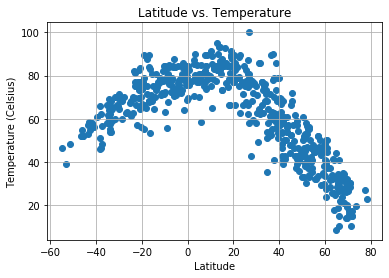

In [38]:
plt.scatter(weather_df["lat"], weather_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

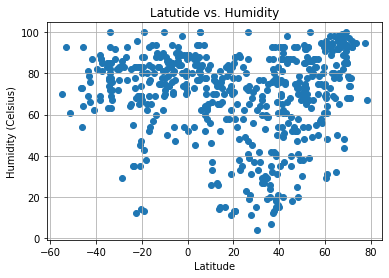

In [39]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Humidity")
plt.ylabel("Humidity (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

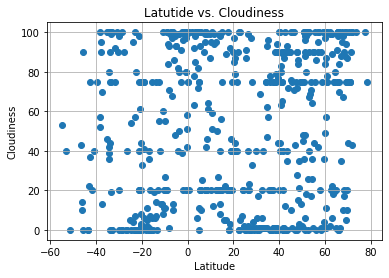

In [40]:
plt.scatter(weather_df["lat"], weather_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

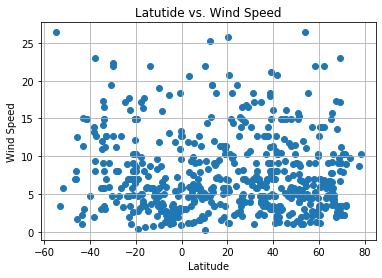

In [41]:
plt.scatter(weather_df["lat"], weather_df["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['lat']>0]
northern_df



,city,lat,temp_max,lon,clouds,humidity,wind speed
2,misratah,32.38,66.52,15.09,6,69,7.45
8,harper,4.38,79.81,-7.72,72,84,5.01
10,oranjestad,12.52,84.20,-70.03,20,70,25.28
12,tazovskiy,67.47,23.74,78.70,95,99,1.99
13,jamestown,42.10,50.00,-79.24,1,37,10.29
...,...,...,...,...,...,...,...
553,kuryk,43.20,53.76,51.65,0,66,3.42
555,bagdarin,54.43,37.38,113.60,64,49,2.04
556,iralaya,15.00,87.80,-83.23,75,66,9.17
561,petropavlovsk-kamchatskiy,53.05,33.80,158.65,40,86,4.47


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
southern_df = weather_df[weather_df['lat']<0]
southern_df



,city,lat,temp_max,lon,clouds,humidity,wind speed
0,acarau,-2.89,78.96,-40.12,91,84,11.90
1,rikitea,-23.12,76.87,-134.97,57,83,17.69
3,ushuaia,-54.80,46.40,-68.30,53,70,26.40
4,bluff,-46.60,52.00,168.33,43,73,7.00
5,cape town,-33.93,62.01,18.42,0,72,5.82
...,...,...,...,...,...,...,...
558,maragogi,-9.01,78.71,-35.22,100,82,8.75
559,ahipara,-35.17,66.16,173.17,100,83,5.77
560,formosa do rio preto,-11.05,71.74,-45.19,13,78,4.07
562,tshikapa,-6.42,72.59,20.80,100,80,2.66


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3773379779315456


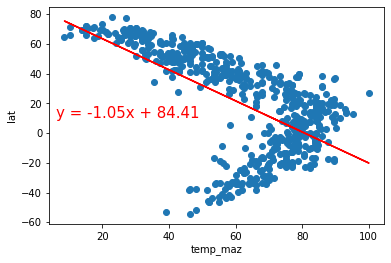

In [66]:
x_values = weather_df['temp_max'].astype('float')
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('temp_max')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.001059556056829559


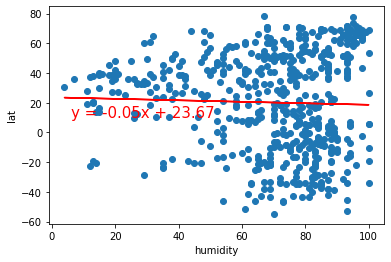

In [69]:
x_values = weather_df['humidity'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('humidity')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.001059556056829559


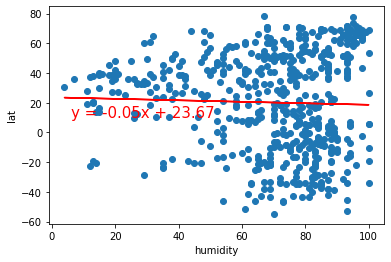

In [70]:
x_values = weather_df['humidity'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('humidity')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.014063436994043594


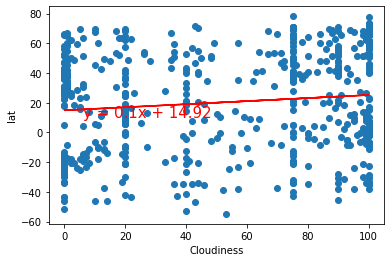

In [78]:
x_values = weather_df['clouds'].astype('float')
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00630356271451006


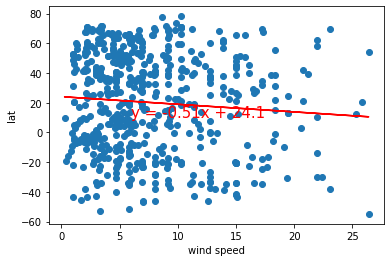

In [79]:
x_values = weather_df['wind speed'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('wind speed')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression